<a href="https://colab.research.google.com/github/makkimaki/pytorch_official_tutorial/blob/main/pytorch_tutorial_3_datasets%26dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets 
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt 


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

before squeeze shape:  torch.Size([1, 28, 28])
after squeeze shape:  torch.Size([28, 28])
-------------------------------------------------------------------
before squeeze shape:  torch.Size([1, 28, 28])
after squeeze shape:  torch.Size([28, 28])
-------------------------------------------------------------------
before squeeze shape:  torch.Size([1, 28, 28])
after squeeze shape:  torch.Size([28, 28])
-------------------------------------------------------------------
before squeeze shape:  torch.Size([1, 28, 28])
after squeeze shape:  torch.Size([28, 28])
-------------------------------------------------------------------
before squeeze shape:  torch.Size([1, 28, 28])
after squeeze shape:  torch.Size([28, 28])
-------------------------------------------------------------------
before squeeze shape:  torch.Size([1, 28, 28])
after squeeze shape:  torch.Size([28, 28])
-------------------------------------------------------------------
before squeeze shape:  torch.Size([1, 28, 28])
after

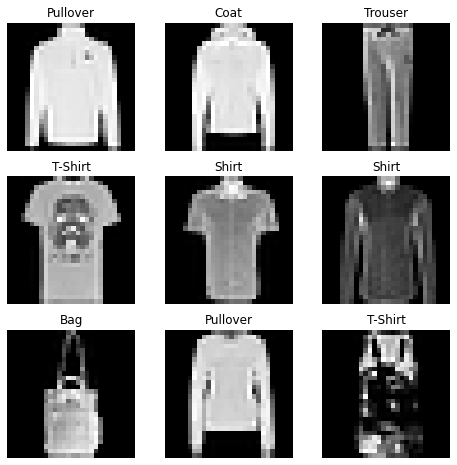

In [9]:
figure = plt.figure(figsize=(8, 8))
num_cols, num_rows = 3, 3

for i in range(1, num_cols * num_rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(num_rows, num_cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print("before squeeze shape: ", img.shape)
    print("after squeeze shape: ", img.squeeze().shape)
    print("-------------------------------------------------------------------")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


# カスタムデータセットの作成(Creating a Custom Dataset for your files)

- `__init__`
-` __len__`
- `__getitem__`

In [11]:
import os 
import pandas as pd
from torchvision.io import read_image 


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform 
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform is True:
            image = self.tranform(image)
        if self.target_transform is True:
            label = self.target_transform(label)
        return image, label

# データローダを使ったデータ用意

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### データローダのiterate

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


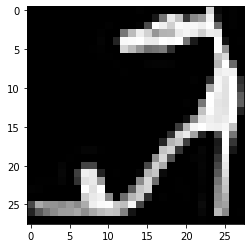

Label: 5


In [14]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")